In [64]:
from music21 import *
import matplotlib.pyplot as plt

In [75]:
from typing import NamedTuple

class Lyric(NamedTuple):
    lyric: str
    beat: float

test = Lyric(beat=1.5, lyric='haha')
print(test)
print(test.lyric)
print(test.beat)

Lyric(lyric='haha', beat=1.5)
haha
1.5


In [66]:
list(corpus.chorales.ChoraleList().byBWV.keys())

[250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419

dict_keys([1])


Text(0.5, 1.0, 'Number of Time Signatures in All Bach Chorales')

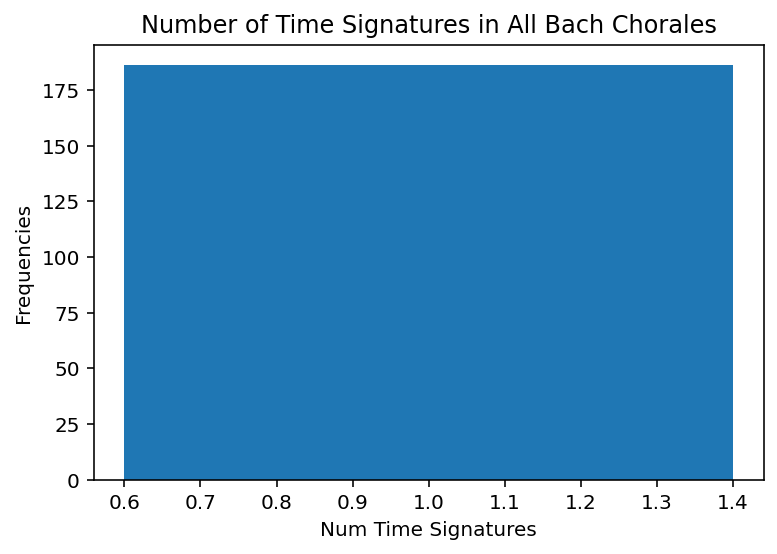

In [67]:
# create a histogram to see how many time signatures are in each Bach chorale
timeSigCounts = {}

for b in corpus.chorales.ChoraleList().byBWV.keys():
    work = corpus.parse('bach/bwv' + str(b))
    count = len(work.parts[0].measure(1).getTimeSignatures())

    if count in timeSigCounts:
        timeSigCounts[count] += 1
    else:
        timeSigCounts[count] = 1

print(timeSigCounts.keys())

plt.bar(list(timeSigCounts.keys()), list(timeSigCounts.values()))
plt.xlabel('Num Time Signatures')
plt.ylabel('Frequencies')
plt.title('Number of Time Signatures in All Bach Chorales')

{'4/4': 164, '3/4': 22}


Text(0.5, 1.0, 'Number of Time Signatures in All Bach Chorales')

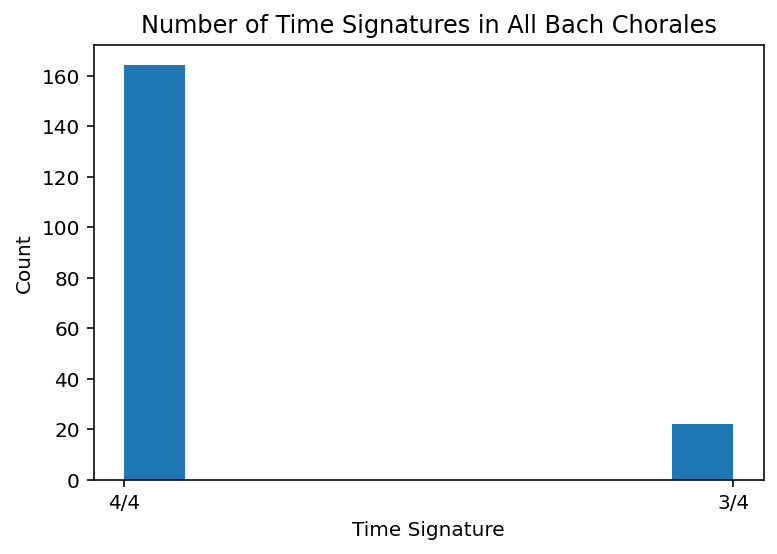

In [68]:
# create a histogram to see the spread of time signatures for all Bach chorales
timeSigs = {}
timeSigsList = []

for b in corpus.chorales.ChoraleList().byBWV.keys():
    work = corpus.parse('bach/bwv' + str(b))
    ts = work.parts[0].measure(1).getTimeSignatures()[0].ratioString
    timeSigsList.append(ts)

    if ts in timeSigs:
        timeSigs[ts] += 1
    else:
        timeSigs[ts] = 1

print(timeSigs)

plt.hist(timeSigsList, rwidth=10)
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.title('Number of Time Signatures in All Bach Chorales')

In [69]:
bwv350 = corpus.parse('bach/bwv350')
time_signatures = bwv350.parts[0].getTimeSignatures()

for ts in time_signatures:
    print("Time Signature:", ts.ratioString)

Time Signature: 4/4


In [70]:
def get_measure_numbers(part):
    nums = []
    for measure in part.recurse().getElementsByClass(stream.Measure):
        nums.append(measure.number)
    return nums

In [71]:
test_dict = {'a':[1, 2], 'b':[11, 12]}
test_dict['a'].append(3)
test_dict['b'].append(13)
test_dict

{'a': [1, 2, 3], 'b': [11, 12, 13]}

In [72]:
def get_lyrics(part):
    lyrics = {key: [] for key in get_measure_numbers(part)}

    for measure in part.recurse().getElementsByClass(stream.Measure):
        for element in measure.recurse().getElementsByClass([note.Note, chord.Chord]):
            if element.lyric:
                lyrics[measure.number].append(Lyric(lyric=element.lyric, beat=element.beat))

    return lyrics

In [83]:
def add_lyrics(score):
    # Create a dictionary to store soprano lyrics per measure
    soprano_lyrics_per_measure = {}

    # Iterate through the soprano part to gather lyrics
    soprano_part = score.parts['Soprano']
    for measure in soprano_part.getElementsByClass(stream.Measure):
        measure_number = measure.number
        soprano_lyrics_per_measure[measure_number] = []
        for note in measure.notes:
            if note.lyric:
                soprano_lyrics_per_measure[measure_number].append(note.lyric)

    # Iterate through other parts and assign soprano lyrics per measure
    for part in score.parts:
        if part.id != "Soprano":
            for measure in part.getElementsByClass(stream.Measure):
                measure_number = measure.number
                if measure_number in soprano_lyrics_per_measure:
                    for note in measure.notes:
                        if note.lyric is None:
                            note.lyric = soprano_lyrics_per_measure[measure_number][0]

    return score

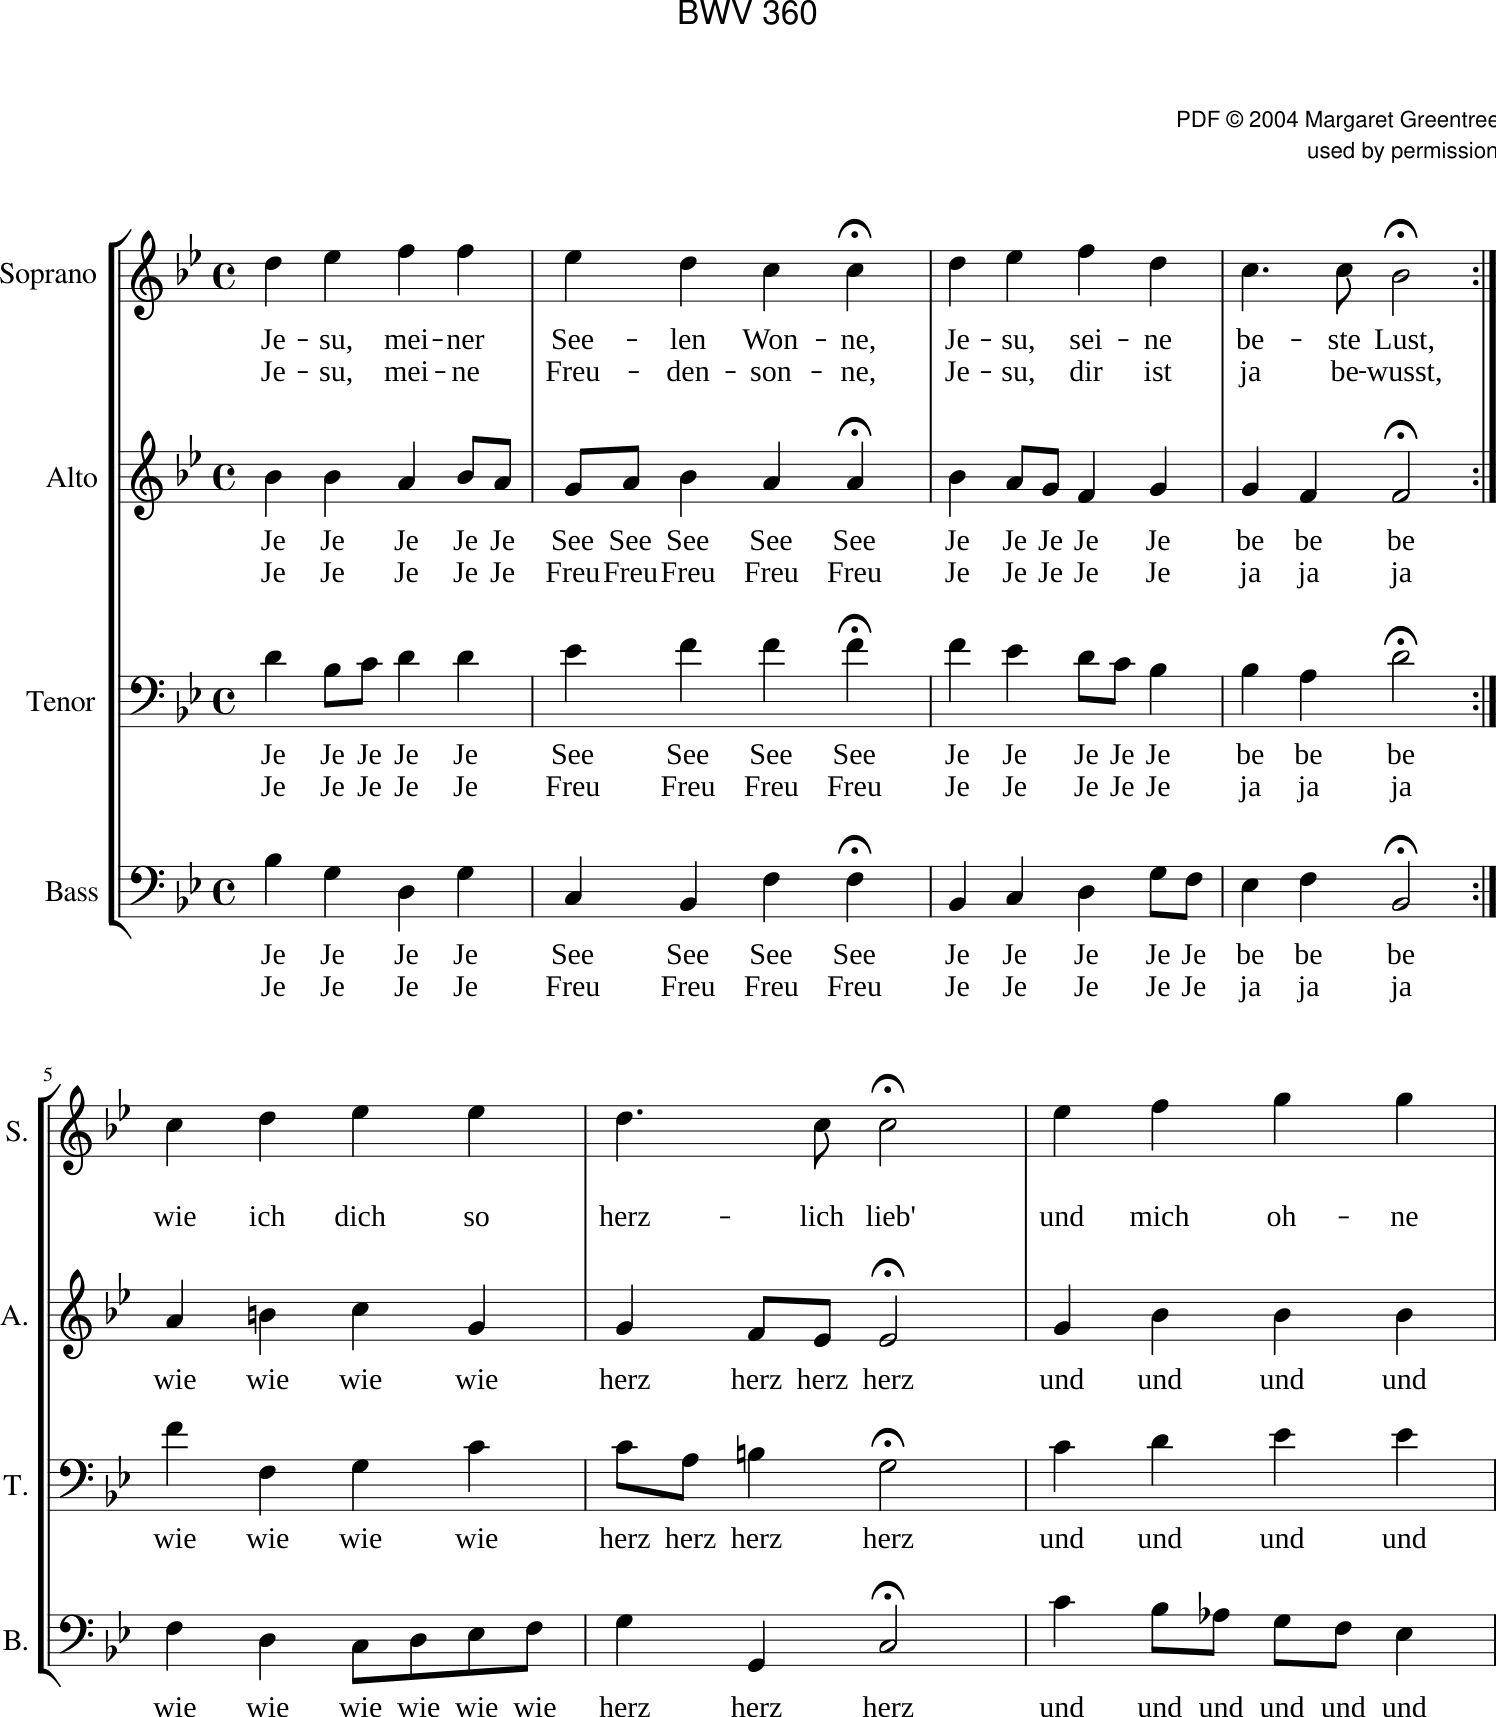

In [84]:
bwv360 = corpus.parse('bach/bwv360')
bwv360 = add_lyrics(bwv360)
bwv360.show()

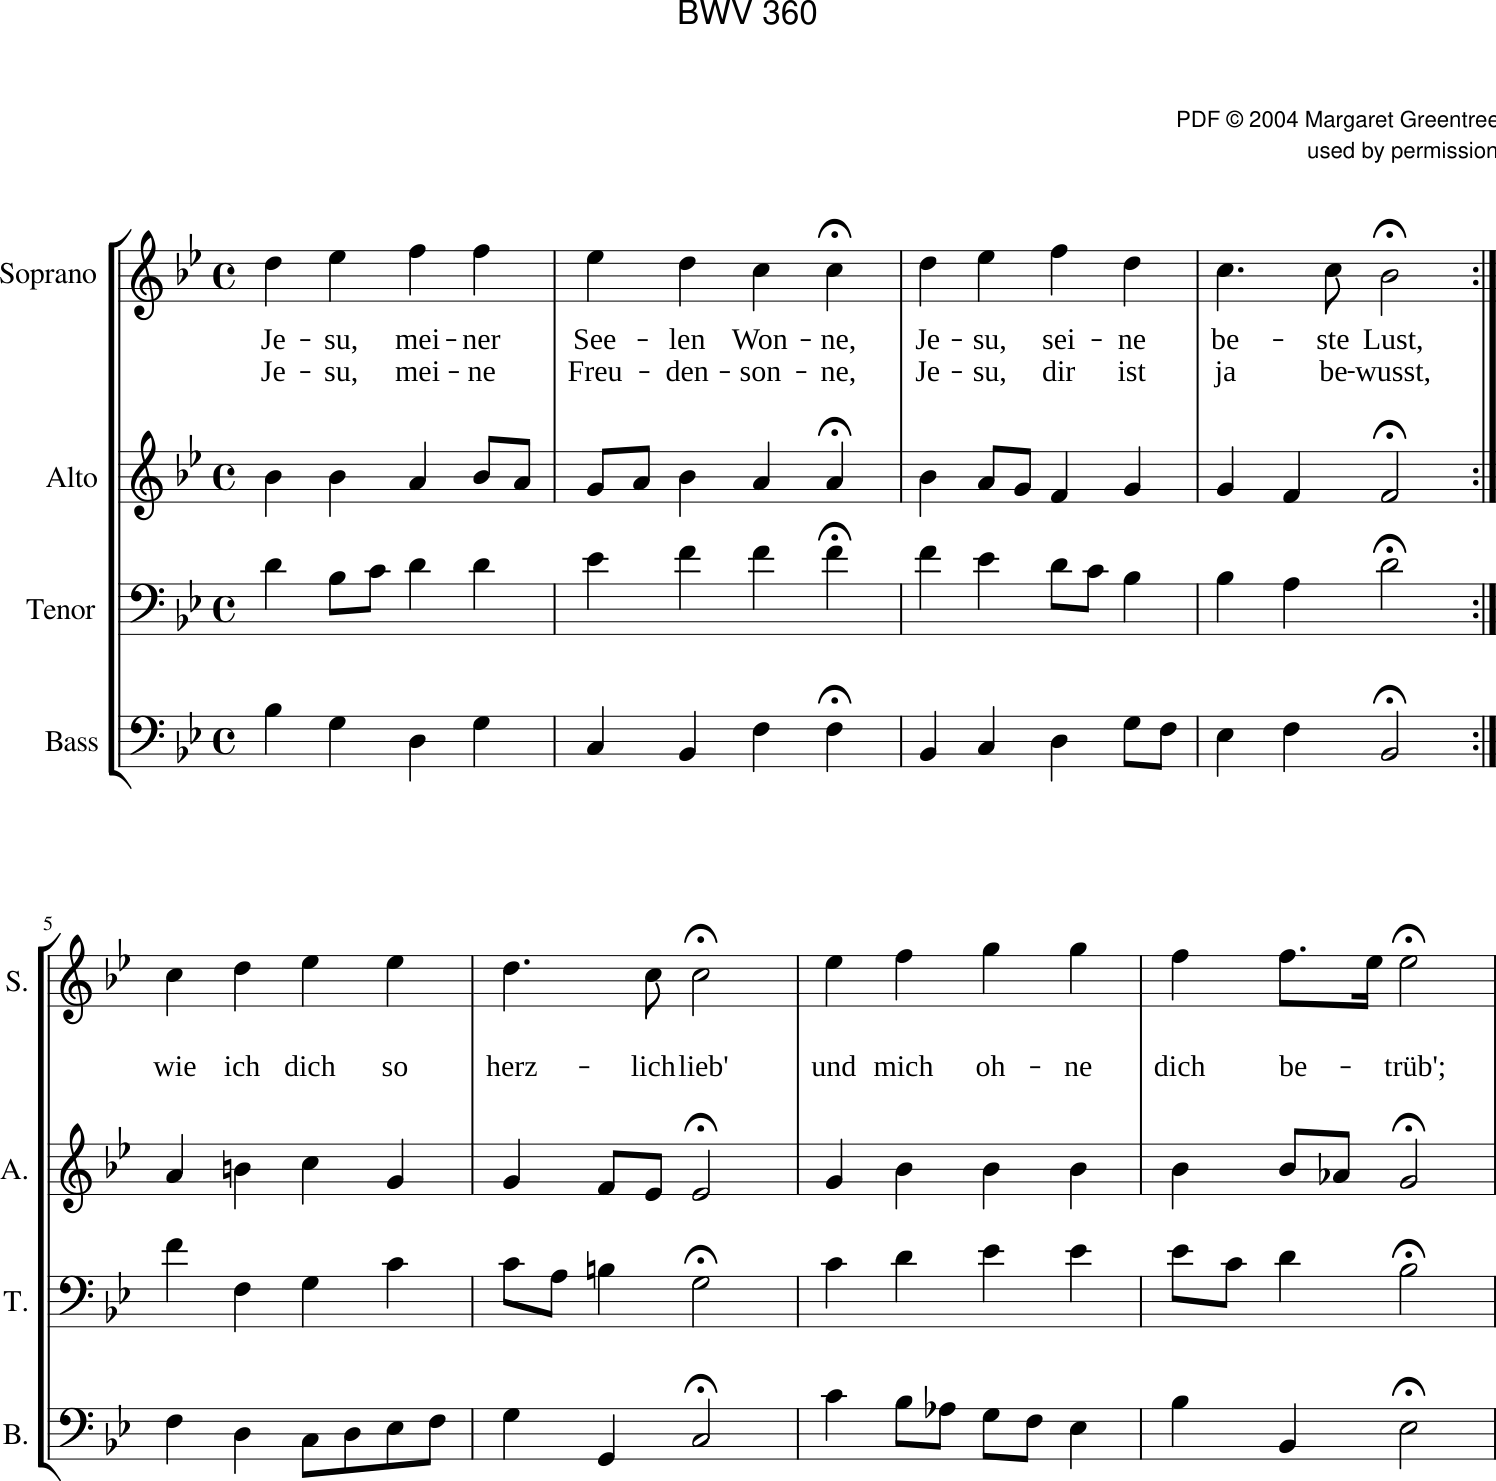

In [1]:
# some random code from ChatGPT and I doubt it works but let's see!
from music21 import *

# Step 2: Load your music score
score = corpus.parse('bach/bwv360')  # Replace with your file path

# Step 3: Extract lyrics from the first part
first_part = score.parts[0]  # Assuming the first part contains the lyrics
lyrics_stream = first_part.getElementsByClass('Lyric')

# Create a list to store the extracted lyrics
lyrics = []
for element in lyrics_stream:
    if isinstance(element, note.Lyric):
        lyrics.append(element.text)

# Step 4 and 5: Iterate through other parts and add lyrics
for part in score.parts[1:]:  # Start from the second part
    for i, element in enumerate(part.getElementsByClass('Lyric')):
        if isinstance(element, note.Lyric):
            element.text = lyrics[i % len(lyrics)]  # Add the lyrics from the first part

# Save the modified score if needed
# score.write('musicxml', 'output_score.xml')  # Replace 'output_score.xml' with your desired output file path

score.show()